<a href="https://colab.research.google.com/github/alejandrodgb/fastai/blob/main/clean/04_mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
#!pip install nbdev

In [2]:
# Prepare notebook
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
# Prepare notebook
from fastai.vision.all import *

In [4]:
# Prepare notebook
from fastbook import *    
matplotlib.rc('image', cmap='Greys')

# Data

In [5]:
# Get MNIST data. Return object is the path where data is located
path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
# Set BASE_PATH of Path to the MNIST data location
Path.BASE_PATH = path

In [7]:
# Review contents of path
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [8]:
# Review contents of train folder
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [9]:
# Save sorted training content
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [10]:
# Review one image
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [11]:
# Convert image to an array
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [12]:
# Convert image to tensor
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [13]:
# Create a dataframe colour map of image
im3t = tensor(im3)
df = pd.DataFrame(im3t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


# Baseline

We will create a baseline calculation to check whether the number is a 3 or a 7. We will be calculating the average digit by calculating the average for each position in the image.

In [14]:
# Create a list of tensors
seven_tensors = [tensor(Image.open(i)) for i in sevens]
three_tensors = [tensor(Image.open(i)) for i in threes]
len(seven_tensors),len(three_tensors)

(6265, 6131)

In [15]:
doc(show_image)

show_image(im, ax=None, figsize=None, title=None, ctx=None, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, filternorm=1, filterrad=4.0, resample=None, url=None, *, data=None, **kwargs)
Show a PIL or PyTorch image on `ax`.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


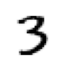

In [16]:
# Review list of tensors
show_image(three_tensors[1])

In [17]:
# Stack the tensors and normalise them between 0 and 1

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
print(f'Stacked sevens shape = {stacked_sevens.shape}\nStacked threes shape = {stacked_threes.shape}')

Stacked sevens shape = torch.Size([6265, 28, 28])
Stacked threes shape = torch.Size([6131, 28, 28])


In [18]:
# Rank of tensor. 
print(f'Stacked sevens rank = {stacked_sevens.ndim}\nStacked threes rank = {stacked_threes.ndim}')

Stacked sevens rank = 3
Stacked threes rank = 3


In [19]:
# This can also be calculated using len of the shape
print(f'Stacked sevens rank = {len(stacked_sevens.shape)}\nStacked threes rank = {len(stacked_threes.shape)}')

Stacked sevens rank = 3
Stacked threes rank = 3


In [20]:
# Calculate the average pixel accross all images
mean7 = stacked_sevens.mean(axis=0)
mean3 = stacked_threes.mean(axis=0)

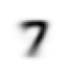

In [21]:
# Display 7s
show_image(mean7);

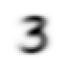

In [22]:
# Display 3s
show_image(mean3);

## Deviation from baseline

### Train data

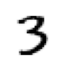

In [23]:
a_3 = stacked_threes[1]
show_image(a_3)

In [24]:
# Calculate the L1 and L2 norms for a sample 3 in the training dataset
dist_3_abs = (a_3-mean3).abs().mean()
dist_3_sqr = ((a_3-mean3)**2).mean().sqrt()
print(dist_3_abs, dist_3_sqr)

# Calculate L1 and L2 norms with pytorch inbuilt loss functions
F.l1_loss(a_3,mean3), F.mse_loss(a_3,mean3).sqrt()

tensor(0.1114) tensor(0.2021)


(tensor(0.1114), tensor(0.2021))

In [25]:
# Calculate the L1 and L2 norms for a sample 7 in the training dataset
dist_7_abs = (a_3-mean7).abs().mean()
dist_7_sqr = ((a_3-mean7)**2).mean().sqrt()
print(dist_7_abs, dist_7_sqr)

# Calculate L1 and L2 norms with pytorch inbuilt loss functions
F.l1_loss(a_3,mean7), F.mse_loss(a_3,mean7).sqrt()

tensor(0.1586) tensor(0.3021)


(tensor(0.1586), tensor(0.3021))

### Validation data

In [26]:
# Create valid 3s tensor
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

# Create valid 7s tensor
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [27]:
# Function to check the deviation to the average number
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))

In [28]:
# Calculate the distance between a sample 3 and the average 3
mnist_distance(a_3, mean3)

tensor(0.1114)

In [29]:
# Calculate the distance for all 3s in the dataset
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist.shape, valid_3_dist

(torch.Size([1010]),
 tensor([0.1075, 0.1096, 0.1229,  ..., 0.1334, 0.1095, 0.1200]))

In [30]:
# Create a function to determine whether it is a 3. If the distance between the
# image and the mean3 is less than the distance between the image and the mean
# 7 then it is classified as a 3
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [31]:
# Calculate the accuracy of the function
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# SGD

We will be calculating the SGD for a simple function

In [32]:
def f(x): return x**2

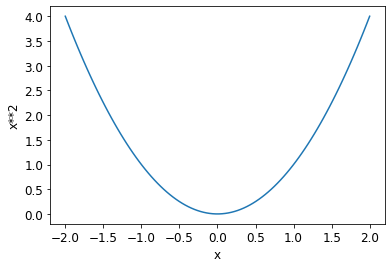

In [33]:
plot_function(f, 'x','x**2')

We will now calculate the gradients

In [34]:
# Create a tensor that tracks the required gradients
xt = tensor(3.).requires_grad_()

In [35]:
# Calculate the function with the given value
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [36]:
# Calculate the gradients 
yt.backward()

In [37]:
# Review the gradients
xt.grad

tensor(6.)

Calculate gradients with a vector

In [38]:
# Create a tensor that tracks the required gradients
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [39]:
# Modify the function to take in a vector and return a scalar
def f(x): return (x**2).sum()

In [40]:
# Calculate the function given the vector
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [41]:
# Calculate the gradients
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

The gradients calculated are the equivalent of the derivative of $x^2$ where $x=$ `tensor([3.,4.,10.])`

## End-to-end example

In [42]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

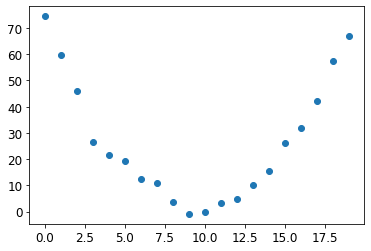

In [43]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

The function define below allows us to determine both the output from the input and also the type of quadratic equation from the parameters.

In [44]:
# Define a function that allows us to calculate parameters and input
def f(t, params):
    a,b,c = params
    return a*(t**2)+(b*t)+c

We define a loss function that will return a value based on the prediction and target where lower values correspond to better predictions.

In [45]:
# Define the loss function
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

## Seven-step SGD process

In [46]:
# 1. Initialise the weights
params = torch.randn(3).requires_grad_()

In [47]:
# 2. Calculate the predictions
preds = f(time, params)

In [48]:
# Create a function to see how close our predictions are to our targets
def show_preds(preds, ax = None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

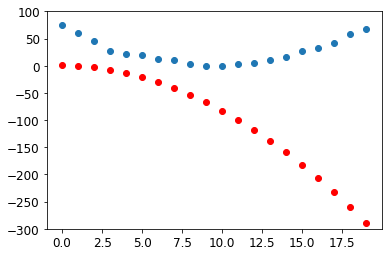

In [49]:
show_preds(preds)

In [50]:
# 3. Calculate the loss
loss = mse(preds, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward0>)

In [51]:
# 4. Calculate the gradients
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

These gradients can then be used to improve the parameters.

In [52]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [53]:
# 5. Step the weights
lr = 1e-5 # LR to update grads
params.data -= lr * params.grad.data # Update params with new weights
params.grad = None # Reset gradients

tensor(160.4228, grad_fn=<SqrtBackward0>)


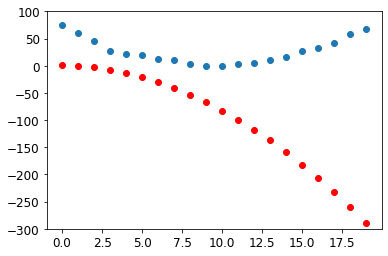

In [54]:
# Check if the prediction has improved
preds = f(time, params)
print(mse(preds,speed))
show_preds(preds)

In [55]:
# Create a function to step the weights
def apply_step(params,lr=1e-3,prn=True):
    # Calculate predictions
    preds = f(time, params)
    # Calculate loss
    loss = mse(preds, speed)
    # Backpropagate loss
    loss.backward()
    # Update parameters
    params.data -= lr*params.grad.data
    # Reset gradients
    params.grad = None
    if prn: print(loss.item())
    return preds


In [56]:
# 6. Repeat the process
for i in range(10): apply_step(params)

160.42279052734375
132.9931182861328
105.96342468261719
79.701171875
55.15536117553711
35.21080017089844
26.438148498535156
26.020627975463867
26.01849365234375
26.01831817626953


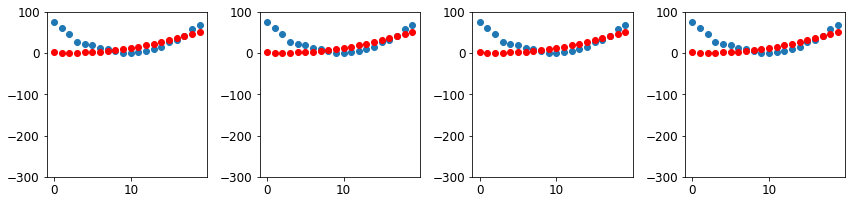

In [59]:
# Plotting the functions
_, axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params,prn=False),ax)
plt.tight_layout()

# MNIST loss function

In [62]:
# Change the concatenated train tensors from a list of matrices (rank-3 tensor) 
# to a list of vectors (rank-2 tensor)
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)
train_x.shape

torch.Size([12396, 784])

In [64]:
# Create a tensor of train labels
train_y = tensor([1]*len(threes)+[0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [68]:
# Zip train_x and train_y to create an object in the right shape
# for pytorch Dataset object
dset = list(zip(train_x, train_y))

In [74]:
# Create validation datasets
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28*28)
valid_y = tensor([1]*len(valid_3_tens)+[0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))